In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import time

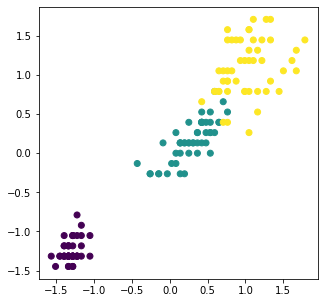

In [2]:
iris = datasets.load_iris()
X = iris.data[:, 2:]
y = iris.target

scaler = StandardScaler()
X = scaler.fit_transform(X)


idx = np.arange(0,len(X),1)
np.random.shuffle(idx)
idx_train = idx[0:int(.7*len(X))]
idx_test = idx[len(idx_train):len(idx)]

X_train = X[idx_train]
X_test = X[idx_test]
y_train = y[idx_train]
y_test = y[idx_test]

X_train = np.insert(X_train, 0, 1, axis=1)
X_test = np.insert(X_test, 0, 1, axis=1)

k = len(set(y))
m = X_train.shape[0]
n = X_train.shape[1]
Y_train_encoded = np.zeros((m, k))
for each_class in range(k):
    cond = y_train == each_class
    Y_train_encoded[np.where(cond), each_class] = 1

plt.figure(figsize=(5,5))
plt.scatter(X[:, 0], X[:, 1], label='class 0', c=y)
plt.show()

In [3]:
print(X_train.shape, X_test.shape, Y_train_encoded.shape, y_test.shape)

(105, 3) (45, 3) (105, 3) (45,)


In [4]:
class LogisticRegression():
    
    def __init__(self, k, method, alpha=0.001, max_iters=1000):
        self.method = method
        self.alpha = alpha
        self.max_iters = max_iters
        self.k = k
        
    def softmax(self, theta_T_X):
        return np.exp(theta_T_X) / np.sum(np.exp(theta_T_X), axis=1, keepdims=True)
    
    def h_theta(self, X):
        return self.softmax(X @ self.W)
    
    def gradient(self,X, Y):
        h = self.h_theta(X)
        error = h - Y
        grad = X.T @ error
        loss = -np.sum(Y * np.log(h)) / X.shape[0]
        return grad, loss
    
    def predict(self, X):
        return np.argmax(self.h_theta(X), axis=1)
    
    def plot(self):
        plt.plot(self.iter, self.losses, label='Training losses')
        plt.xlabel('iterations')
        plt.ylabel('Training loss')
        plt.title('Training loss vs iterations')
        plt.legend()
        
    def fit(self,X, Y):
        self.W = np.zeros((X.shape[1], self.k))
        self.losses = []
        self.iter = []
        
        if self.method == 'batch':
            start_time = time.time()
            for i in range(self.max_iters):
                grad, cost = self.gradient(X, Y)
                self.W = self.W - self.alpha * grad
                if i % 500 == 0:
                    print(f"Cost at iterations {i}", cost)
                    self.losses.append(cost)
                    self.iter.append(i)
            end_time = time.time()
            print(f"Time taken for batch {end_time - start_time}")
            
        elif self.method == 'sto':
            start_time = time.time()
            used_ix = []
            for i in range(self.max_iters):
                ix = np.random.randint(X.shape[0])
                while ix in used_ix:
                    ix = np.random.randint(X.shape[0])
                used_ix.append(ix)
                if len(used_ix) == X.shape[0]:
                    used_ix = []
                Xi = X[ix, :].reshape(1, -1)
                Yi = Y[ix]
                grad, cost = self.gradient(Xi, Yi)
                self.W = self.W - self.alpha * grad
                if i % 500 == 0:
                    print(f"Cost at iterations {i}", cost)
                    self.losses.append(cost)
                    self.iter.append(i)
            end_time = time.time()
            print(f"Time taken for sto {end_time - start_time}")
            
        elif self.method == 'mini-batch':
            start_time = time.time()
            batch_size = int(0.1 * X.shape[0])
            for i in range(self.max_iters):
                shuffle_index = np.random.permutation(X.shape[0])
                X_shuffled = X[shuffle_index]
                Y_shuffled = Y[shuffle_index]
                for index in range(0, X.shape[0], batch_size):
                    Xi = X_shuffled[index : index + batch_size]
                    Yi = Y_shuffled[index : index + batch_size]
                    grad, cost = self.gradient(Xi, Yi)
                    self.W = self.W - self.alpha * grad
                if i % 500 == 0:
                    print(f"Cost at iterations {i}", cost)
                    self.losses.append(cost)
                    self.iter.append(i)
            end_time = time.time()
            print(f"Time taken for mini-batch {end_time - start_time}")
        
        else:
            raise ValueError('Method must be one of the followings: "batch", "mini-batch", "sto".')
            
                
            

Cost at iterations 0 1.0986122886681098
Cost at iterations 500 0.1994774900852717
Cost at iterations 1000 0.15591654738683217
Cost at iterations 1500 0.13831726583080559
Cost at iterations 2000 0.12842788833961064
Cost at iterations 2500 0.12196964539905183
Cost at iterations 3000 0.11737638510549839
Cost at iterations 3500 0.11392610897027164
Cost at iterations 4000 0.11123446963842808
Cost at iterations 4500 0.10907563644599035
Cost at iterations 5000 0.10730703613767303
Cost at iterations 5500 0.10583362293698978
Cost at iterations 6000 0.10458928288703465
Cost at iterations 6500 0.10352643527169221
Cost at iterations 7000 0.10260987250791147
Cost at iterations 7500 0.10181293409206375
Cost at iterations 8000 0.10111503462915412
Cost at iterations 8500 0.10050001261428061
Cost at iterations 9000 0.09995499561805493
Cost at iterations 9500 0.099469600992494
Time taken for batch 0.2641322612762451
Classification
Report:                precision    recall  f1-score   support

         

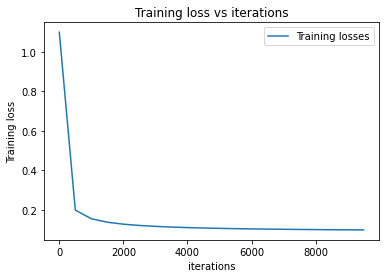

In [5]:
model = LogisticRegression(k, method = 'batch', max_iters=10000)
model.fit(X_train, Y_train_encoded)
model.plot()
yhat = model.predict(X_test)
print("="*20)
print("Classification")
print(f"Report: ",classification_report(y_test, yhat))

Cost at iterations 0 1.0986122886681098
Cost at iterations 500 0.8929593183706712
Cost at iterations 1000 0.5082323268934114
Cost at iterations 1500 1.0497365529271052
Cost at iterations 2000 0.5799574700642851
Cost at iterations 2500 0.8986491342335859
Cost at iterations 3000 0.4317046422180143
Cost at iterations 3500 0.2102385552789852
Cost at iterations 4000 0.5380625880839747
Cost at iterations 4500 0.6170929714240637
Cost at iterations 5000 0.1569509604281875
Cost at iterations 5500 0.34199454353684033
Cost at iterations 6000 0.6033170236240016
Cost at iterations 6500 0.68903295254605
Cost at iterations 7000 0.73368281976546
Cost at iterations 7500 0.6940686851296829
Cost at iterations 8000 0.7910040305252409
Cost at iterations 8500 0.6693028922971425
Cost at iterations 9000 0.2943879287312516
Cost at iterations 9500 0.11863641429726947
Time taken for sto 0.3518342971801758
Classification
Report:                precision    recall  f1-score   support

           0       1.00      

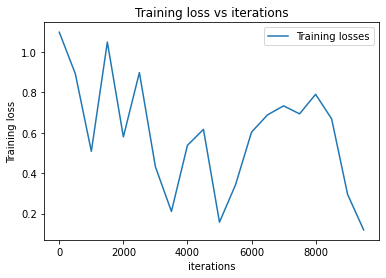

In [6]:
model = LogisticRegression(k, method = 'sto', max_iters=10000)
model.fit(X_train, Y_train_encoded)
model.plot()
yhat = model.predict(X_test)
print("="*20)
print("Classification")
print(f"Report: ",classification_report(y_test, yhat))

Cost at iterations 0 1.0418943675537662
Cost at iterations 500 0.10986731817991036
Cost at iterations 1000 0.17766230312286763
Cost at iterations 1500 0.43188144822880864
Cost at iterations 2000 0.2321181134614816
Cost at iterations 2500 0.2499019924137774
Cost at iterations 3000 0.09586342365935754
Cost at iterations 3500 0.4257044084569282
Cost at iterations 4000 0.010519666824099537
Cost at iterations 4500 0.03214888546958041
Cost at iterations 5000 0.004386032142258233
Cost at iterations 5500 0.02002985545391238
Cost at iterations 6000 0.023632971509061036
Cost at iterations 6500 0.04831763693937138
Cost at iterations 7000 0.22261204713502206
Cost at iterations 7500 0.0784247523506835
Cost at iterations 8000 0.3991461479624565
Cost at iterations 8500 0.5620365659949427
Cost at iterations 9000 0.019348886440227163
Cost at iterations 9500 0.06074289812671685
Time taken for mini-batch 2.326227903366089
Classification
Report:                precision    recall  f1-score   support

    

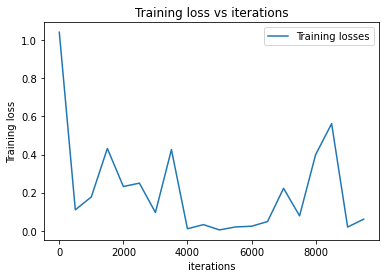

In [7]:
model = LogisticRegression(k, method = 'mini-batch', max_iters=10000)
model.fit(X_train, Y_train_encoded)
model.plot()
yhat = model.predict(X_test)
print("="*20)
print("Classification")
print(f"Report: ",classification_report(y_test, yhat))

In [8]:
model = LogisticRegression(k, method = 'Death Vader', max_iters=10000)
model.fit(X_train, Y_train_encoded)
model.plot()
yhat = model.predict(X_test)
print("="*20)
print("Classification")
print(f"Report: ",classification_report(y_test, yhat))

ValueError: Method must be one of the followings: "batch", "mini-batch", "sto".